In [1]:
# !pip install tensorflow
# !pip install keras
# !pip install matplotlib

In [2]:
import os
import time

In [3]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

TensorFlow Version: 2.20.0
Keras Version: 3.13.2


In [4]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

10 класів, 60.000 зображень, кожне 32х32 пікселі

In [5]:
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Також виділимо дані для валідації

In [6]:
val_images, val_labels = train_images[-5000:], train_labels[-5000:]
train_images, train_labels = train_images[:-5000], train_labels[:-5000]

In [7]:
train_images.shape

(45000, 32, 32, 3)

Також виділимо дані для валідації

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

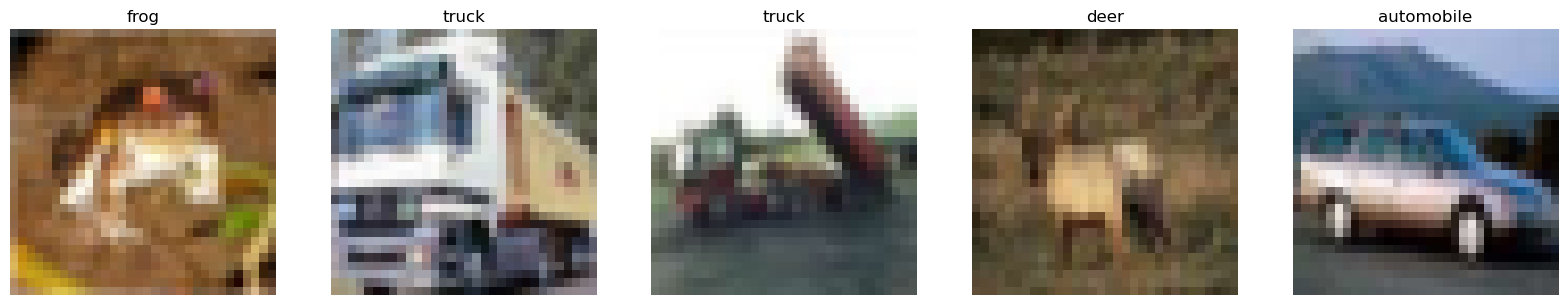

In [9]:
plt.figure(figsize=(20, 20))
for i, (image, label) in enumerate(train_dataset.take(5)):
    ax = plt.subplot(5, 5, i+1)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')
    plt.imshow(image)

Також виділимо дані для валідації

In [10]:
def preprocess_image(image, label):
    image = tf.image.per_image_standardization(image) #normalize
    image = tf.image.resize(image, (227, 227))
    return image, label

In [11]:
def preprocess_dataset(ds):
    return ds.map(preprocess_image).shuffle(ds.cardinality()).batch(batch_size=32, drop_remainder=True)

In [12]:
train_dataset = preprocess_dataset(train_dataset)
val_dataset = preprocess_dataset(val_dataset)
test_dataset = preprocess_dataset(test_dataset)

ініціалізація архітектури моделі

In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation="relu", input_shape=(227, 227, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), activation="relu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation="relu"),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(4096, activation="relu"),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation="softmax")
])

C:\Users\Kate\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


налаштування логування

In [14]:
root_logdir = os.path.join(os.curdir, "lab6_logs")
run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
run_logdir = os.path.join(root_logdir, run_id)

In [15]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

компіляція моделі

In [16]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=["accuracy"]
)

тренування моделі

In [ ]:
model.fit(train_dataset, epochs=50, validation_data=val_dataset, validation_freq=1, callbacks=[tensorboard_cb])

Epoch 1/50
 827/1406 ━━━━━━━━━━━━━━━━━━━━ 20:58 2s/step - accuracy: 0.2531 - loss: 2.8336

оцінка моделі

In [ ]:
model.evaluate(test_dataset)